<a href="https://colab.research.google.com/github/hafeezjaan77/Code/blob/hafeezjaan77-patch-1/Aromatase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 1] Download Bioactivity Data (Concised version)**

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 1, we will be performing Data Collection and Pre-Processing from the ChEMBL Database.

    Redundant code cells were deleted.
    Code cells for saving files to Google Drive has been deleted.



ChEMBL Database

The ChEMBL Database is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 80,480 documents, 1.4 million assays and the data spans 14,000 targets and 2,000 cells and 3,000 indications. [Data as of January 15, 2021; ChEMBL version 28].



# **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.


In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.4-cp37-none-any.whl size=55663 sha256=387ddfca5fd8adc4d49890cd4b7c92a4ec351060dbc30be3de001b4ad05cc52f
  Stored in directory: /root/.cache/pip/wheels/98/4c/16/bdb2ef9c937173e56b04d71fc1a6f98f0ff24992ae2e35daf3
Successfully built chembl-webresource-client


**Importing libraries**

In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client


# **Search for Target protein**

**Target search for Aromatase**


In [3]:
# Target search for Aromatase
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116



**Select and retrieve bioactivity data for Human Aromatase (first entry)**

We will assign the fifth entry (which corresponds to the target protein, Human Aromatase) to the selected_target variable


In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

Here, we will retrieve only bioactivity data for Human Aromatase (CHEMBL1978) that are reported as pChEMBL values.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,False,http://www.openphacts.org/units/Nanomolar,267172,=,1,True,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,False,http://www.openphacts.org/units/Nanomolar,267163,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,False,http://www.openphacts.org/units/Nanomolar,214178,=,1,True,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,False,http://www.openphacts.org/units/Nanomolar,214179,=,1,True,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,False,http://www.openphacts.org/units/Nanomolar,214173,=,1,True,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,None,19480245,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2ccc(C(F)(F)F)cc2)n2cnnc...,None,None,CHEMBL4477276,Bioorg Med Chem,2016.0,"{'bei': '17.84', 'le': '0.33', 'lle': '2.50', ...",CHEMBL4560281,None,CHEMBL4560281,7.84,False,http://www.openphacts.org/units/Nanomolar,3257438,=,1,True,=,None,IC50,nM,None,14.52,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,7.838
2885,None,19480246,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2cccc(C(F)(F)F)c2)n2cnnc...,None,No

Finally we will save the resulting bioactivity data to a CSV file bioactivity_data.csv.

In [8]:
df.to_csv('aromatase_01_bioactivity_data_raw.csv', index=False)


# **Handling missing data**

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.


In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,False,http://www.openphacts.org/units/Nanomolar,267172,=,1,True,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,False,http://www.openphacts.org/units/Nanomolar,267163,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,False,http://www.openphacts.org/units/Nanomolar,214178,=,1,True,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,False,http://www.openphacts.org/units/Nanomolar,214179,=,1,True,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,False,http://www.openphacts.org/units/Nanomolar,214173,=,1,True,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,None,19480245,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2ccc(C(F)(F)F)cc2)n2cnnc...,None,None,CHEMBL4477276,Bioorg Med Chem,2016.0,"{'bei': '17.84', 'le': '0.33', 'lle': '2.50', ...",CHEMBL4560281,None,CHEMBL4560281,7.84,False,http://www.openphacts.org/units/Nanomolar,3257438,=,1,True,=,None,IC50,nM,None,14.52,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,7.838
2885,None,19480246,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2cccc(C(F)(F)F)c2)n2cnnc...,None,No

In [10]:
len(df2.canonical_smiles.unique())

2051

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,False,http://www.openphacts.org/units/Nanomolar,267172,=,1,True,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,False,http://www.openphacts.org/units/Nanomolar,267163,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,False,http://www.openphacts.org/units/Nanomolar,214178,=,1,True,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,False,http://www.openphacts.org/units/Nanomolar,214179,=,1,True,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,False,http://www.openphacts.org/units/Nanomolar,214173,=,1,True,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,None,19480231,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,None,None,CHEMBL4477276,Bioorg Med Chem,2016.0,"{'bei': '18.11', 'le': '0.39', 'lle': '3.94', ...",CHEMBL4564168,None,CHEMBL4564168,7.23,False,http://www.openphacts.org/units/Nanomolar,3257433,=,1,True,=,None,IC50,nM,None,58.85,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,58.85
2871,None,19480232,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,None,None,C

# **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2870,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85
2871,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58
2872,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12
2873,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77


In [13]:
df3.to_csv('aromatase_02_bioactivity_data_preprocessed.csv', index=False)


**Labeling compounds as either being active, inactive or intermediate**

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.


In [14]:
df4 = pd.read_csv('aromatase_02_bioactivity_data_preprocessed.csv')

In [15]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active


Saves dataframe to CSV file

In [17]:
df5.to_csv('aromatase_03_bioactivity_data_curated.csv', index=False)

In [18]:
! zip aromatase.zip *.csv

  adding: aromatase_01_bioactivity_data_raw.csv (deflated 90%)
  adding: aromatase_02_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: aromatase_03_bioactivity_data_curated.csv (deflated 81%)


In [19]:
! ls -l

total 1896
-rw-r--r-- 1 root root 1447194 Jun  9 15:46 aromatase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  132090 Jun  9 15:46 aromatase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  151010 Jun  9 15:46 aromatase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  198561 Jun  9 15:46 aromatase.zip
drwxr-xr-x 1 root root    4096 Jun  1 13:40 sample_data


# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis **

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 2, we will be performing Descriptor Calculation and Exploratory Data Analysis.


# **Install conda and rdkit**

In [45]:
! wget https://conda.io/miniconda.html

--2021-06-09 16:24:40--  https://conda.io/miniconda.html
Resolving conda.io (conda.io)... 104.21.29.195, 172.67.149.185, 2606:4700:3031::ac43:95b9, ...
Connecting to conda.io (conda.io)|104.21.29.195|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://conda.io/en/latest/miniconda [following]
--2021-06-09 16:24:40--  https://conda.io/en/latest/miniconda
Reusing existing connection to conda.io:443.
HTTP request sent, awaiting response... 302 Found
Location: https://docs.conda.io/en/latest/miniconda.html [following]
--2021-06-09 16:24:41--  https://docs.conda.io/en/latest/miniconda.html
Resolving docs.conda.io (docs.conda.io)... 104.21.29.195, 172.67.149.185, 2606:4700:3037::6815:1dc3, ...
Connecting to docs.conda.io (docs.conda.io)|104.21.29.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘miniconda.html.1’

miniconda.html.1        [ <=>                ]  23.58K  --.-KB/s    in 0.004s  

2

In [46]:
! wget http://www.lfd.uci.edu/~gohlke/pythonlibs/#numpy

URL transformed to HTTPS due to an HSTS policy
--2021-06-09 16:25:08--  https://www.lfd.uci.edu/~gohlke/pythonlibs/
Resolving www.lfd.uci.edu (www.lfd.uci.edu)... 128.195.135.4
Connecting to www.lfd.uci.edu (www.lfd.uci.edu)|128.195.135.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3174507 (3.0M) [text/html]
Saving to: ‘index.html.2’

index.html.2        100%[===================>]   3.03M  6.43MB/s    in 0.5s    

2021-06-09 16:25:09 (6.43 MB/s) - ‘index.html.2’ saved [3174507/3174507]



In [47]:
! wget https://python-pillow.github.io/

--2021-06-09 16:25:16--  https://python-pillow.github.io/
Resolving python-pillow.github.io (python-pillow.github.io)... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
Connecting to python-pillow.github.io (python-pillow.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://python-pillow.org/ [following]
--2021-06-09 16:25:16--  https://python-pillow.org/
Resolving python-pillow.org (python-pillow.org)... 185.199.108.153, 185.199.110.153, 185.199.111.153, ...
Connecting to python-pillow.org (python-pillow.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7817 (7.6K) [text/html]
Saving to: ‘index.html.3’

index.html.3        100%[===================>]   7.63K  --.-KB/s    in 0s      

2021-06-09 16:25:16 (57.7 MB/s) - ‘index.html.3’ saved [7817/7817]



# **Load bioactivity data**

In [24]:
df = pd.read_csv('aromatase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active


In [25]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [26]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [27]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.00,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.00,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.00,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.00,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.00,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2046,CHEMBL4564168,58.85,active,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1
2047,CHEMBL4568674,57.58,active,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...
2048,CHEMBL4575939,12.12,active,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...
2049,CHEMBL4536893,39.77,active,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br


# **Calculate Lipinski descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

    Molecular weight < 500 Dalton
    Octanol-water partition coefficient (LogP) < 5
    Hydrogen bond donors < 5
    Hydrogen bond acceptors < 10

**Import libraries**


In [48]:
! wget https://conda.io/miniconda.html

--2021-06-09 16:29:38--  https://conda.io/miniconda.html
Resolving conda.io (conda.io)... 104.21.29.195, 172.67.149.185, 2606:4700:3037::6815:1dc3, ...
Connecting to conda.io (conda.io)|104.21.29.195|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://conda.io/en/latest/miniconda [following]
--2021-06-09 16:29:39--  https://conda.io/en/latest/miniconda
Reusing existing connection to conda.io:443.
HTTP request sent, awaiting response... 302 Found
Location: https://docs.conda.io/en/latest/miniconda.html [following]
--2021-06-09 16:29:39--  https://docs.conda.io/en/latest/miniconda.html
Resolving docs.conda.io (docs.conda.io)... 172.67.149.185, 104.21.29.195, 2606:4700:3031::ac43:95b9, ...
Connecting to docs.conda.io (docs.conda.io)|172.67.149.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘miniconda.html.1’

miniconda.html.1        [ <=>                ]  23.58K  --.-KB/s    in 0.002s  



In [52]:
import numpy as np

In [64]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-py39_4.9.2-Windows-x86_64.exe
!chmod +x Miniconda3-py39_4.9.2-Windows-x86_64.exe
!time bash ./Miniconda3-py39_4.9.2-Windows-x86_64.exe -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-09 16:52:36--  https://repo.continuum.io/miniconda/Miniconda3-py39_4.9.2-Windows-x86_64.exe
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Windows-x86_64.exe [following]
--2021-06-09 16:52:36--  https://repo.anaconda.com/miniconda/Miniconda3-py39_4.9.2-Windows-x86_64.exe
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60530216 (58M) [application/octet-stream]
Saving to: ‘Miniconda3-py39_4.9.2-Windows-x86_64.exe’

Miniconda3-py39_4.9 100%[===================>]  57.73M  78.0MB/s    in 0.7s    

2021-06-09 16:52:37 (

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [76]:
import pandas as pd

In [77]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [78]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [79]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2046,399.208,3.29038,0.0,7.0
2047,399.208,3.29038,0.0,7.0
2048,419.195,3.32690,0.0,8.0
2049,374.198,3.41870,0.0,6.0



**Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.


In [80]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2046,399.208,3.29038,0.0,7.0
2047,399.208,3.29038,0.0,7.0
2048,419.195,3.32690,0.0,8.0
2049,374.198,3.41870,0.0,6.0


In [81]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active


Now, let's combine the 2 DataFrame

In [82]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [83]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active,399.208,3.29038,0.0,7.0
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active,399.208,3.29038,0.0,7.0
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active,419.195,3.32690,0.0,8.0
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active,374.198,3.41870,0.0,6.0


**Convert IC50 to pIC50**

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10$^{-9}$
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [108]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [109]:
df_combined.standard_value.describe()

count      2051.000000
mean      14694.722829
std       51508.359707
min           0.000000
25%         130.000000
50%        1252.000000
75%        8850.000000
max      777000.000000
Name: standard_value, dtype: float64

In [110]:
-np.log10( (10**-9)* 100000000 )

1.0

In [111]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [112]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [113]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.00
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,58.85
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,57.58
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,12.12
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,39.77


In [114]:
df_norm.standard_value_norm.describe()

count      2051.000000
mean      14694.722829
std       51508.359707
min           0.000000
25%         130.000000
50%        1252.000000
75%        8850.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [115]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,7.230254
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,7.239728
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,7.916497
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,7.400444


In [116]:
df_final.pIC50.describe()

count    2051.000000
mean             inf
std              NaN
min         3.109579
25%         5.053064
50%         5.902396
75%         6.886057
max              inf
Name: pIC50, dtype: float64

Let's write this to CSV file

In [117]:
df_final.to_csv('aromatase_04_bioactivity_data_3class_pIC50.csv')

**Removing the 'intermediate' bioactivity class**

Here, we will be removing the intermediate class from our data set.

In [118]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,7.230254
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,7.239728
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,7.916497
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,7.400444


Let's write this to CSV file.

In [119]:
df_2class.to_csv('aromatase_05_bioactivity_data_2class_pIC50.csv')

# **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**


**Import library**

In [120]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

**Frequency plot of the 2 bioactivity classes**

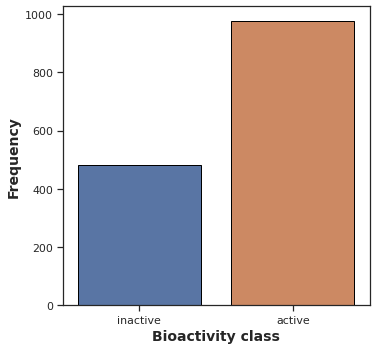

In [121]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

In [124]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


ValueError: ignored

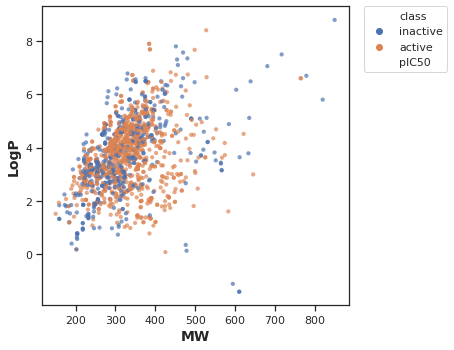

In [128]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

**Box plots**

pIC50 value

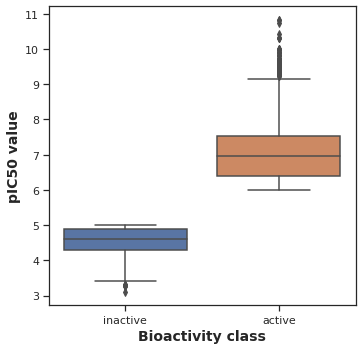

In [129]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [130]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [131]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.504027e-212,0.05,Different distribution (reject H0)


**MW**

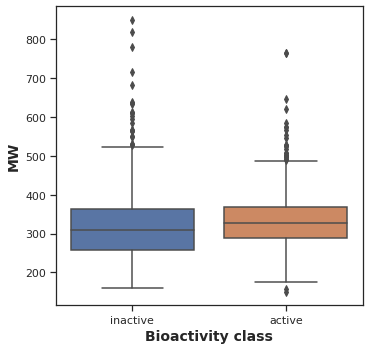

In [132]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [133]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,204285.5,0.000022,0.05,Different distribution (reject H0)


**LogP**

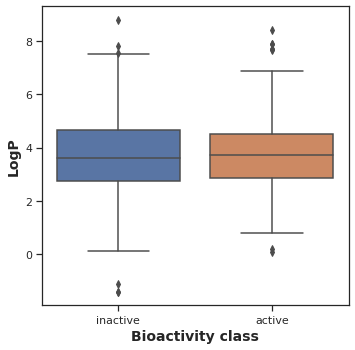

In [134]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**NumHDonors**


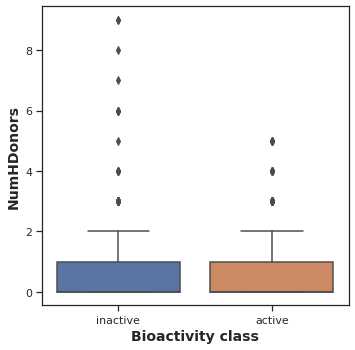

In [135]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Statistical analysis | Mann-Whitney U Test

In [136]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,219956.0,0.011175,0.05,Different distribution (reject H0)


**NumHAcceptors**

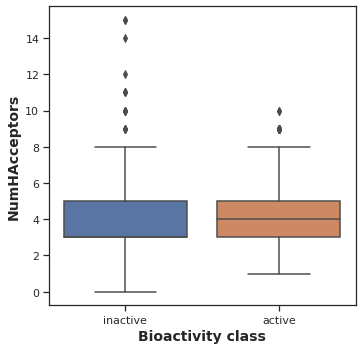

In [137]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [138]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,219458.0,0.016994,0.05,Different distribution (reject H0)


# Interpretation of Statistical Results

**Box Plots**

**pIC50 values**

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

# **Zip files**

In [139]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 37%)
  adding: aromatase_01_bioactivity_data_raw.csv (deflated 90%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: aromatase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: aromatase_02_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: mannwhitneyu_pIC50.csv (deflated 12%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 13%)
  adding: aromatase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: aromatase_03_bioactivity_data_curated.csv (deflated 81%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)


# **Bioinformatics Project - Computational Drug Discovery [Part 3] Descriptor Calculation and Dataset Preparation**



In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 3, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

**Download PaDEL-Descriptor**

In [143]:
pip install padelpy

     |████████████████████████████████| 20.9MB 1.6MB/s 


# **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [146]:
df = pd.read_csv('aromatase_04_bioactivity_data_3class_pIC50.csv')

In [150]:
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...,...
2046,2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,7.230254
2047,2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,7.239728
2048,2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,7.916497
2049,2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,7.400444


In [148]:
import pandas as pd

In [151]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [152]:
! cat molecule.smi | head -5

CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021


In [153]:
! cat molecule.smi | wc -l

2051


# **Calculate fingerprint descriptors**

**Calculate PaDEL descriptors**

cat: padel.sh: No such file or directory
